# This tutorial illustrates the usage of wnnet.

Begin by installing necessary packages.

In [1]:
import sys
!{sys.executable} -m pip install --quiet requests
#!{sys.executable} -m pip install --quiet wnnet

Next, import the necessary packages:

In [2]:
import wnnet as wn
import os, io, requests
import networkx as nx
from IPython.display import Image

Now install [pygraphviz](https://pygraphviz.github.io), which is needed for viewing the graphs.  To do so, we must first install the linux *graphviz* and *graphviz-dev* packages.  If you are running on your own system, you may have to change the installer from *apt* to something else like *dnf* or *port*.  See the [pygraphviz installation](https://pygraphviz.github.io/documentation/stable/install.html) page.

In [3]:
!apt-get -qq install graphviz &> /dev/null
!apt-get -qq install libgraphviz-dev &> /dev/null
!{sys.executable} -m pip install --quiet pygraphviz

### Physical constants

This module contains the physical constants such as the speed of light and Boltzmann's constant used in the calculations for the wnnet package.  Those constants are defined the [gslconsts](https://gslconsts.readthedocs.io) package.  That package imports cgs versions of the constants defined in the GNU Scientific Library (GSL).  Webnucleo codes use cgs constants from GSL, so, for consistency, the wnnet package uses the same constants.  All of the GSL constants, as defined in [gslconsts](https://gslconsts.readthedocs.io), are available in the wnnet package, but a handful of particularly useful ones are defined with shorter abbreviations, as illustrated in the next cell.

In [4]:
print('Speed of light in cm/s:', wn.consts.c)
print('Conversion of ergs to Mev:', wn.consts.ergs_to_MeV)
print('Conversion of MeV to ergs:', wn.consts.MeV_to_ergs)
print('Boltzmann\'s Constant (ergs/K):', wn.consts.k_B)
print('Mass of Electron (g):', wn.consts.m_e)
print('Mass of 1 AMU (g):', wn.consts.u)
print('Avogadro\'s constant:', wn.consts.N_A)
print('Planck\'s constant divided by 2pi (erg-s):', wn.consts.hbar)
print('Electron rest mass energy (MeV):', wn.consts.m_e_in_MeV)
print('AMU rest mass energy (MeV):', wn.consts.m_u_in_MeV)

Speed of light in cm/s: 29979245800.0
Conversion of ergs to Mev: 624150.9647120418
Conversion of MeV to ergs: 1.602176487e-06
Boltzmann's Constant (ergs/K): 1.3806504e-16
Mass of Electron (g): 9.10938188e-28
Mass of 1 AMU (g): 1.660538782e-24
Avogadro's constant: 6.02214199e+23
Planck's constant divided by 2pi (erg-s): 1.05457162825e-27
Electron rest mass energy (MeV): 0.5109988947017501
AMU rest mass energy (MeV): 931.4940282330006


### View and compute nuclide data

Frist, create a network instance that includes all of the nuclear and reaction data. Here we read the data from an example file from [OSF](https://osf.io/4gmyr/).  Alternatively, you can read a local file (called *out.xml*) as shown in the commented command.

In [5]:
net = wn.net.Net(io.BytesIO(requests.get('https://osf.io/4gmyr/download').content))
#net = wn.net.Net('out.xml')

The wnnet package inherits the classes from [wnutils](https://wnutils.readthedocs.io).  Thus, once the network is available, you can retrieve the nuclde data from the webnucleo XML file, as one does in [wnutils](https://wnutils.readthedocs.io), by typing:

In [6]:
nuclides = net.get_nuclides()

This returns a dictionary of data with the key being the nuclide name. Here we will show the first two nuclides. For each nuclide, the attributes are nuclide name, z, n, a and et al, which can be found below. 

In [7]:
example = list(nuclides.items())[:2]

for keys, nuclide in example:
    print('Nuclide Name :', keys)
    for attribute, value in nuclide.items():
        print('{} : {}'.format(attribute, value))
    print()

Nuclide Name : h2
z : 1
a : 2
n : 1
state : 
source : ame11
mass excess : 13.136
spin : 1.0
t9 : [ 0.1   0.15  0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   1.    1.5
  2.    2.5   3.    3.5   4.    4.5   5.    6.    7.    8.    9.   10.  ]
partf : [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]

Nuclide Name : he3
z : 2
a : 3
n : 1
state : 
source : ame11
mass excess : 14.931
spin : 0.5
t9 : [ 0.1   0.15  0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   1.    1.5
  2.    2.5   3.    3.5   4.    4.5   5.    6.    7.    8.    9.   10.  ]
partf : [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]



You may print out all the data for a specific nuclide, say, o16, by typing:

In [8]:
print(nuclides['o16'])

{'z': 8, 'a': 16, 'n': 8, 'state': '', 'source': 'ame11', 'mass excess': -4.737, 'spin': 0.0, 't9': array([ 0.1 ,  0.15,  0.2 ,  0.3 ,  0.4 ,  0.5 ,  0.6 ,  0.7 ,  0.8 ,
        0.9 ,  1.  ,  1.5 ,  2.  ,  2.5 ,  3.  ,  3.5 ,  4.  ,  4.5 ,
        5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  ]), 'partf': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])}


To get a specific property of a nuclide, like mass excess or data source, try typing:

In [9]:
print(nuclides['o16']['mass excess'])
print(nuclides['o16']['source'])

-4.737
ame11


To get the arrays giving temperatures and partition functions at those temperatures for a given species, type:

In [10]:
print('Temperature in GK :', nuclides['ca41']['t9'])
print('Partition function :', nuclides['ca41']['partf'])

Temperature in GK : [ 0.1   0.15  0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   1.    1.5
  2.    2.5   3.    3.5   4.    4.5   5.    6.    7.    8.    9.   10.  ]
Partition function : [ 8.          8.          8.          8.          8.          8.
  8.          8.          8.          8.          8.          8.
  8.          8.          8.          8.          8.07999993  8.07999993
  8.15999997  8.48000068  9.12000102 10.24000072 11.99999284 14.63999698]


We can also compute the partition function for a nuclide at a specific temperature, as interpolated from the arrays, by typing:

In [11]:
pf = net.compute_nuclear_partition_function('ca41', 6.7)
print('The partition function of ca41 at temperature T9 = 6.7 is :', pf)

The partition function of ca41 at temperature T9 = 6.7 is : 8.884333042159062


To get the quantum abundance of the nuclide at the input temperature (GK) and density (g/cc).

In [12]:
Y_Q = net.compute_quantum_abundance('o16', 0.2, 10)
print('The quantum abundance of o16 at T9 = 0.2 and $\\rho$ = 10 is :', '{:.2f}'.format(Y_Q))

The quantum abundance of o16 at T9 = 0.2 and $\rho$ = 10 is : 5646352130.47


You can also compute the binding energy (MeV) of a species by typing.

In [13]:
B = net.compute_binding_energy('ca40')
print('The binding energy of ca40 is', B, 'MeV.')

The binding energy of ca40 is 342.046 MeV.


### Reaction data
You can retrieve the reaction data from the network by typing:

In [14]:
reactions = net.get_reactions()

This returns a dictionary with the key being the reaction string and the value being a [wnutils](https://wnutils.readthedocs.io) reaction. To see a list of the reactions (here shows the first four reactions), type:

In [15]:
for r in list(reactions.items())[0:4]:
    print(r)

('h1 + cd101 -> he4 + ag98', <wnutils.xml.Reaction object at 0x127040550>)
('nd135 -> pr135 + positron + neutrino_e', <wnutils.xml.Reaction object at 0x12d58da50>)
('n + pr128 -> h1 + ce128', <wnutils.xml.Reaction object at 0x12d69ab50>)
('n + nd146 -> nd147 + gamma', <wnutils.xml.Reaction object at 0x12d69ad90>)


You can also check whether a reaction is weak reaction or not, by typing:

In [16]:
for r, value in list(reactions.items())[:4]:
    print(r)
    print(net.is_weak_reaction(r))


h1 + cd101 -> he4 + ag98
False
nd135 -> pr135 + positron + neutrino_e
True
n + pr128 -> h1 + ce128
False
n + nd146 -> nd147 + gamma
False


You can use an XPath expression to select the reactions with specific reactants and products. For example, you can type:

In [17]:
induced_reac_xpath = "[(reactant = 'n' and product = 'gamma') or (product = 'electron') or (reactant = 'electron') or (product = 'positron')]"
induced_reactions = net.get_reactions(reac_xpath=induced_reac_xpath)

This will return a dictionary of reactions that includes the specific reactants and products. We can print it (the first four) out by typing:

In [18]:
for key, value in list(induced_reactions.items())[:4]:
    print('reaction :', key)

reaction : nd135 -> pr135 + positron + neutrino_e
reaction : n + nd146 -> nd147 + gamma
reaction : n + tc94 -> tc95 + gamma
reaction : n + ca47 -> ca48 + gamma


You may choose a particular reaction from the dictionary and see the properties of this reaction by typing:

In [19]:
reac = reactions['n + ni56 -> ni57 + gamma']
print('Reactants :', reac.reactants)
print('Products :', reac.products)
print('Source :', reac.source)

Reactants : ['n', 'ni56']
Products : ['ni57', 'gamma']
Source : ths8


You can also compute the rate for the reaction above (among interacting multiplets and assuming one of the standard rate forms single_rate, rate_table, or non_smoker_fit) at a variety of temperatures by typing:

In [20]:
import numpy as np
t9s = np.power(10., np.linspace(-2, 1, 10))
for t9 in t9s:
    print('Temperature :', '{:.2f}'.format(t9), '; ', 'Reaction rate :', '{:.4f}'.format(reac.compute_rate(t9))) 

Temperature : 0.01 ;  Reaction rate : 7450015.9754
Temperature : 0.02 ;  Reaction rate : 6950522.6940
Temperature : 0.05 ;  Reaction rate : 6385499.1035
Temperature : 0.10 ;  Reaction rate : 5781506.6789
Temperature : 0.22 ;  Reaction rate : 5191946.6311
Temperature : 0.46 ;  Reaction rate : 4707323.2685
Temperature : 1.00 ;  Reaction rate : 4467881.8713
Temperature : 2.15 ;  Reaction rate : 4664719.4468
Temperature : 4.64 ;  Reaction rate : 5235307.6220
Temperature : 10.00 ;  Reaction rate : 3639565.2466


### Network data
One can read a local reaction network by setting reduced nuclides Xpath and reduced reactions Xpath. Here is an example.

In [21]:
induced_nuc_xpath = "[(a=1) or (z >= 20 and a - z >= 20 and z <= 25 and a - z <= 25)]"
induced_reac_xpath = "[(reactant = 'n' and product = 'gamma') or (product = 'electron')]"

The first line selects nuclides with proton number larger or equal to 20 and smaller or equal to 25, with neutron number larger or equal to 25 and smaller or equal to 25.  The second chooses reactions with the specified reactants and products.

With those selected nuclides and their reactions, one can compute the reaction Q values (the amount of energy absorbed or released during the nuclear reaction) by typing:

In [22]:
Q_value = net.compute_Q_values(induced_nuc_xpath, induced_reac_xpath)

This will return a dictionary with keys being the reaction strings and values storing the Q values. The following command shows the first four reactions and the corresponding Q values.

In [23]:
for reac, Q in list(Q_value.items())[:10]:
    print('Reaction :', reac, '  ', 'Q_value :', '{:.2f} MeV'.format(Q))

Reaction : n + v46 -> v47 + gamma    Q_value : 13.00 MeV
Reaction : n + ca41 -> ca42 + gamma    Q_value : 11.48 MeV
Reaction : n + cr48 -> cr49 + gamma    Q_value : 10.58 MeV
Reaction : n + ti44 -> ti45 + gamma    Q_value : 9.53 MeV
Reaction : n + v47 -> v48 + gamma    Q_value : 10.54 MeV
Reaction : n + v44 -> v45 + gamma    Q_value : 15.83 MeV
Reaction : ca45 -> sc45 + electron + anti-neutrino_e    Q_value : 0.26 MeV
Reaction : n + sc44 -> sc45 + gamma    Q_value : 11.32 MeV
Reaction : n + ca43 -> ca44 + gamma    Q_value : 11.13 MeV
Reaction : n + mn47 -> mn48 + gamma    Q_value : 14.73 MeV


One can compute the forward and reverse rates of a collection of reactions at a specific temperature. 

In [24]:
reac_rates = net.compute_rates(2, induced_nuc_xpath, induced_reac_xpath)


This will return a dictionary containing the rates.  The key is the reaction string while the value is a two-element tuple with the first element being the forward rate and the second element being the reverse rate. Print out the first several of these.

In [25]:
for key, values in list(reac_rates.items())[:10]:
    print('reaction :', key, ';', 'Forward rate :', '{:.2e}'.format(values[0]), ';', 'Reverse rate :', '{:.2e}'.format(values[1]))

reaction : n + v46 -> v47 + gamma ; Forward rate : 4.73e+06 ; Reverse rate : 4.11e-17
reaction : n + ca41 -> ca42 + gamma ; Forward rate : 3.68e+06 ; Reverse rate : 1.90e-11
reaction : n + cr48 -> cr49 + gamma ; Forward rate : 7.92e+06 ; Reverse rate : 1.30e-10
reaction : n + ti44 -> ti45 + gamma ; Forward rate : 1.02e+07 ; Reverse rate : 3.25e-08
reaction : n + v47 -> v48 + gamma ; Forward rate : 5.38e+06 ; Reverse rate : 8.09e-10
reaction : n + v44 -> v45 + gamma ; Forward rate : 8.80e+05 ; Reverse rate : 3.50e-24
reaction : ca45 -> sc45 + electron + anti-neutrino_e ; Forward rate : 4.95e-08 ; Reverse rate : 0.00e+00
reaction : n + sc44 -> sc45 + gamma ; Forward rate : 6.46e+06 ; Reverse rate : 1.14e-11
reaction : n + ca43 -> ca44 + gamma ; Forward rate : 6.09e+06 ; Reverse rate : 2.59e-10
reaction : n + mn47 -> mn48 + gamma ; Forward rate : 1.16e+05 ; Reverse rate : 3.22e-22


### Reaction flows

This module calculates the reaction flows in a network based on a given set of mass fractions, input temperature, and density. Here we again use the XML [data](https://osf.io/4gmyr) from [OSF](https://osf.io/zhrfn), but the commented command shows how to use a local file.

In [26]:
zone_data = wn.zones.Zones_Xml(io.BytesIO(requests.get('https://osf.io/4gmyr/download').content))
#zone_data = wn.zones.Zones_Xml("out.xml")

To retrieve data objects for all zones, simply execute the command:

In [27]:
my_zone_xpath = ""
zones = zone_data.get_zones(zone_xpath=my_zone_xpath)

When executed, this module will generate a dictionary containing the data for all zones in the network. Each zone in the dictionary will have its zone number and all associated properties. If we only need data for a specific range of zones (for instance, zones 20 to 30), we can retrieve the data objects for those zones by using XPath.  For example, try the following command:

In [28]:
my_zone_xpath = "[position() >= 20 and position() <= 25]"
zones = zone_data.get_zones(zone_xpath=my_zone_xpath)

Now, you can compute the flow data in those selected zones by typing:

In [29]:
f = wn.flows.compute_flows_for_zones(net, zones)

When executed, this command will generate a dictionary for the selected zones, where each zone will contain a sub-dictionary storing its respective flow data. Specifically, the first three reactions for each zone will be displayed.

In [30]:
for key, value in f.items():
    print('Zone Number :', key)
    for attri, flows in list(value.items())[:3]:
        print('Reaction :', attri)
        print('Forward flow, Reverse flow:', flows)

Zone Number : 19
Reaction : h1 + cd101 -> he4 + ag98
Forward flow, Reverse flow: (0.0, 0.0)
Reaction : nd135 -> pr135 + positron + neutrino_e
Forward flow, Reverse flow: (0.0, 0)
Reaction : n + pr128 -> h1 + ce128
Forward flow, Reverse flow: (0.0, 0.0)
Zone Number : 20
Reaction : h1 + cd101 -> he4 + ag98
Forward flow, Reverse flow: (0.0, 0.0)
Reaction : nd135 -> pr135 + positron + neutrino_e
Forward flow, Reverse flow: (0.0, 0)
Reaction : n + pr128 -> h1 + ce128
Forward flow, Reverse flow: (0.0, 0.0)
Zone Number : 21
Reaction : h1 + cd101 -> he4 + ag98
Forward flow, Reverse flow: (9.48684662536777e-28, 1.5567134840421488e-42)
Reaction : nd135 -> pr135 + positron + neutrino_e
Forward flow, Reverse flow: (0.0, 0)
Reaction : n + pr128 -> h1 + ce128
Forward flow, Reverse flow: (0.0, 0.0)
Zone Number : 22
Reaction : h1 + cd101 -> he4 + ag98
Forward flow, Reverse flow: (5.299518987748902e-27, 1.3385241926521424e-37)
Reaction : nd135 -> pr135 + positron + neutrino_e
Forward flow, Reverse flow

Typically, we are interested in the reaction flow at a specific time step, rather than calculating all reaction flows. To achieve this, it is necessary to select the appropriate zone to obtain the data for that specific time step.

In [31]:
zone_20 = zone_data.get_zones(zone_xpath="[position() = 20]")

This will return a dictionary including the zone number 19 and all the properties like temperature, density, mass fraction, timestep et al. For this zone, we can compute abundance flows by typing. 

In [32]:
f = wn.flows.compute_flows_for_zones(net, zone_20)

Upon execution, this command will generate a dictionary with keys representing reaction strings and values consisting of tuples showing the forward and reverse flows for each reaction. To print the first four reactions in zone 20, use the following command:

In [33]:
for key, value in f.items():
    print('Zone Number :', key)
    for attri, flows in list(value.items())[:4]:
        print('Reaction :', attri)
        print('Forward flow, Reverse flow:', flows)

Zone Number : 19
Reaction : h1 + cd101 -> he4 + ag98
Forward flow, Reverse flow: (0.0, 0.0)
Reaction : nd135 -> pr135 + positron + neutrino_e
Forward flow, Reverse flow: (0.0, 0)
Reaction : n + pr128 -> h1 + ce128
Forward flow, Reverse flow: (0.0, 0.0)
Reaction : n + nd146 -> nd147 + gamma
Forward flow, Reverse flow: (0.0, 0.0)


It is useful to compute the link between the reactants (source node) and products (reverse node) in reactions. In the analysis of branchings, we will use thoes link flows to create branching graph. As an example, we could compute all of the flow links in zone 20. 

In [34]:
f = wn.flows.compute_link_flows_for_zones(net, zone_20, include_dt=True)

This will return a dictionary with keys being the reaction string and values being a tuple showing the source node, target node, and the link weight.

In [35]:
for i in f:
    print('Zone number :', i)
    for key, value in list(f[i].items())[:4]:
        print('Reaction :', key)
        print('(Source, Target, Weight) :', value)

Zone number : 19
Reaction : h1 + cd101 -> he4 + ag98
(Source, Target, Weight) : [('h1', 'he4', 0.0), ('h1', 'ag98', 0.0), ('cd101', 'he4', 0.027096975106338964), ('cd101', 'ag98', 0.027096975106338964), ('he4', 'h1', 0.0), ('he4', 'cd101', 0.0), ('ag98', 'h1', 9.469820278202525e-19), ('ag98', 'cd101', 9.469820278202525e-19)]
Reaction : nd135 -> pr135 + positron + neutrino_e
(Source, Target, Weight) : [('nd135', 'pr135', 1.556101281344548e-06)]
Reaction : n + pr128 -> h1 + ce128
(Source, Target, Weight) : [('n', 'h1', 0.0), ('n', 'ce128', 0.0), ('pr128', 'h1', 1.3084704629959544e-09), ('pr128', 'ce128', 1.3084704629959544e-09), ('h1', 'n', 0.0), ('h1', 'pr128', 0.0), ('ce128', 'n', 1.670413624606034e-09), ('ce128', 'pr128', 1.670413624606034e-09)]
Reaction : n + nd146 -> nd147 + gamma
(Source, Target, Weight) : [('n', 'nd147', 0.0), ('nd146', 'nd147', 1.675863564619095e-11), ('nd147', 'n', 4.8600170759373515), ('nd147', 'nd146', 4.8600170759373515)]


If we would like to compute the link flows for a set of zones, we can replace the zone 20 to a group of zones by typing: 

In [36]:
f = wn.flows.compute_link_flows_for_zones(net, zones, include_dt=True)

This will return a dictionary with keys being the zone labels. For each zone, there is a dictionary with keys the reaction strings and values a list of tuples showing (Source, Target, Weight). The commands below show the first two reactions in each zone.  

In [37]:
for i in f:
    print('Zone:', i)
    for key, value in list(f[i].items())[:2]:
        print(key, ":", value)
    print("\n")

Zone: 19
h1 + cd101 -> he4 + ag98 : [('h1', 'he4', 0.0), ('h1', 'ag98', 0.0), ('cd101', 'he4', 0.027096975106338964), ('cd101', 'ag98', 0.027096975106338964), ('he4', 'h1', 0.0), ('he4', 'cd101', 0.0), ('ag98', 'h1', 9.469820278202525e-19), ('ag98', 'cd101', 9.469820278202525e-19)]
nd135 -> pr135 + positron + neutrino_e : [('nd135', 'pr135', 1.556101281344548e-06)]


Zone: 20
h1 + cd101 -> he4 + ag98 : [('h1', 'he4', 0.0), ('h1', 'ag98', 0.0), ('cd101', 'he4', 0.0480542015492734), ('cd101', 'ag98', 0.0480542015492734), ('he4', 'h1', 0.0), ('he4', 'cd101', 0.0), ('ag98', 'h1', 4.2356340404242187e-17), ('ag98', 'cd101', 4.2356340404242187e-17)]
nd135 -> pr135 + positron + neutrino_e : [('nd135', 'pr135', 2.942396296194296e-06)]


Zone: 21
h1 + cd101 -> he4 + ag98 : [('h1', 'he4', 8.217580853080875e-30), ('h1', 'ag98', 8.217580853080875e-30), ('cd101', 'he4', 0.06983304802572426), ('cd101', 'ag98', 0.06983304802572426), ('he4', 'h1', 1.9150479037536042e-37), ('he4', 'cd101', 1.91504790375

### Network graphs

This section will show how to create a network graph. First, we induce a subset of nuclides and reactions to show in the graph.

In [38]:
my_induced_nuc_xpath="[z >= 20 and z <= 30 and a - z >= 10 and a - z <= 40]"
my_induced_reac_xpath = "[(reactant = 'h1' and product = 'gamma') or (product = 'electron') or (reactant = 'electron') or (product = 'positron')]"

We can next set the title and corresponding attributes of the graph by typing:

In [39]:
graph_attributes = {
    "label": "My Network Graph",
    "labelloc": "t",
    "fontsize": 30,
    "fontcolor": "blue",
}

We can also set the properties of the edges, vertices, and special vertices in the graph. 

In [40]:
edge_attributes = {"penwidth": 2}

node_attributes = {"style": "filled", "fillcolor": "bisque"}

special_attributes = {
    "fe56": {"fillcolor": "green", "shape": "oval", "style": "filled"}
}

We can change the properties of the vertices representing the solar species.

In [41]:
solar_attributes = {"fillcolor": "white", "style": "filled"}

It is often desirable to display different types of reactions in a graph using distinct colors. To accomplish this, a color tuple can be defined to specify the color for specific reaction types.

In [42]:
color_tuples = [
    ("[product = 'electron']", "blue"),
    ("[(reactant = 'electron') or (product = 'positron')]", "red"),
]

Now, we can create the network graph with all the properties we have set above.

In [43]:
my_graph = wn.graph.create_network_graph(
    net,
    direction= "forward", #"forward" or "reverse" or "both"
    induced_nuc_xpath=my_induced_nuc_xpath,
    induced_reac_xpath=my_induced_reac_xpath,
    reaction_color_tuples=color_tuples,
    graph_attributes=graph_attributes,
    allow_isolated_species=True,
    edge_attributes=edge_attributes,
    node_attributes=node_attributes,
    solar_node_attributes=solar_attributes,
    special_node_attributes=special_attributes,
)

The graph is a [networkx](https://networkx.org) multidigraph. This graph can then be converted to [graphviz](https://graphviz.org) format and saved using the following command.  Here we save it to *png* format:

In [44]:
A = nx.nx_agraph.to_agraph(my_graph)
A.layout()
A.draw('net.png')

Next, we view it with the image viewer.

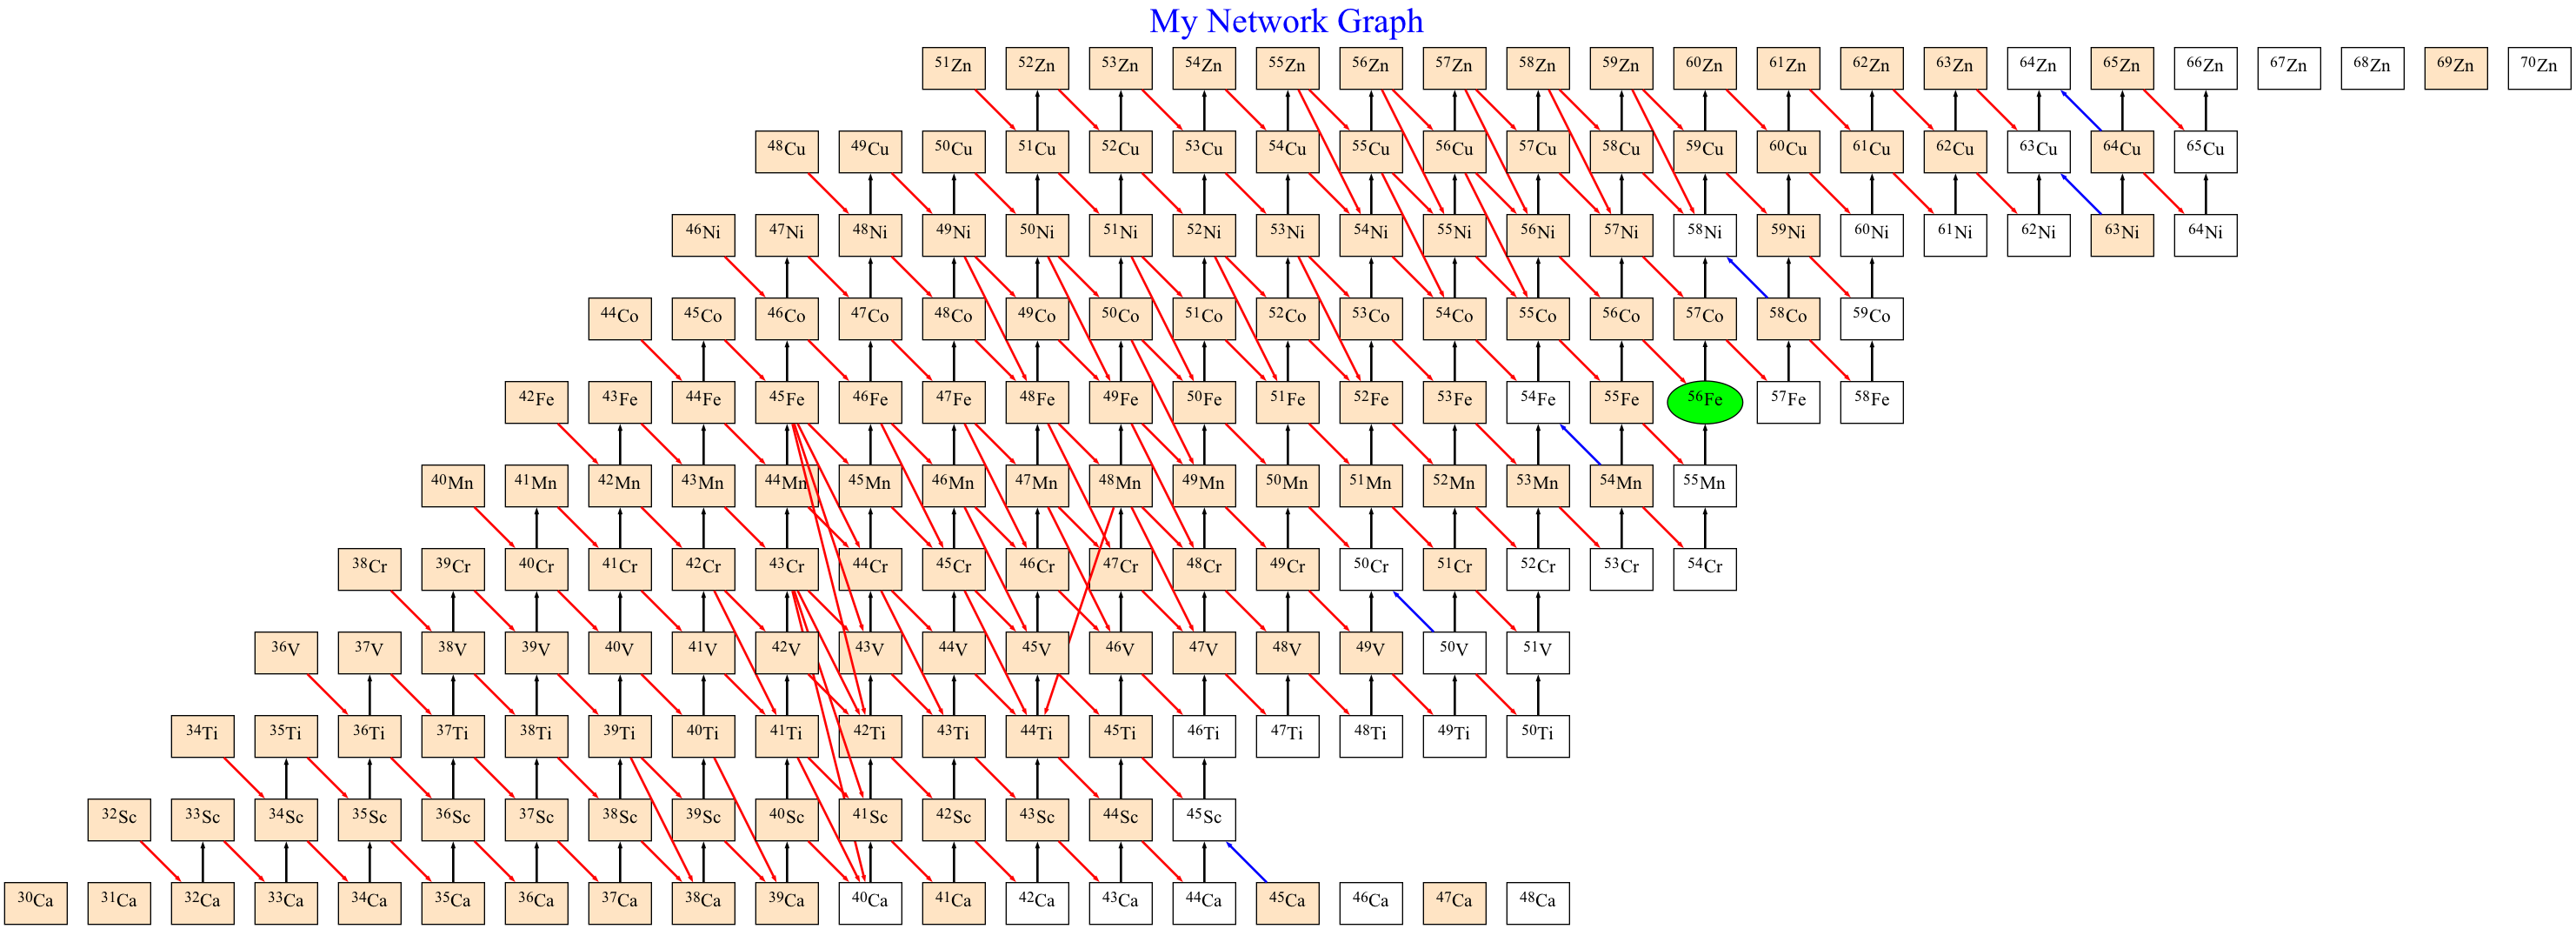

In [45]:
Image(filename=('./net.png'))

### Abundance flow graphs

This section shows how to create a graph showing the abundance flows between species. Abundance flows are the number of nuclei per nucleon undergoing the reaction per second.  The graph shows the nuclides as graph vertices and reactions as arcs between the vertices.  The thickness of an arc indicates the strength of the given flow in that reaction.

First, we specify the nuclides we would like to explore and set the title properties.

In [46]:
induced_nuc_xpath = "[z >= 24 and a - z >= 25 and z <= 30 and a - z <= 35]"
graph_attributes = {
    "labelloc": "t",
    "fontsize": 30,
    "fontcolor": "blue",
}

To distinguish different types of reactions, we set different types of reactions to different colors with color_tuples. 

In [47]:
color_tuples = [
    ("[(reactant = 'h1' and product = 'n') or (reactant = 'n' and product = 'h1')]", "green",),
    ("[(reactant = 'he4' and product = 'h1') or (reactant = 'h1' and product = 'he4')]", "red",),
    ("[product = 'electron']", "blue"),
]

We can also specify the edge attributions. Also, if one wants to use one or more species as special elements, they can set the special attributes. Here Fe56 is an example.   

In [48]:
edge_attributes = {"arrowsize": 0.2}  # This is the default anyway

special_attributes = {
    "fe56": {"fillcolor": "cyan", "shape": "oval", "style": "filled"}
}

With all of the attributes set, we can create the dictionary of flow graphs.  The keys of the dictionary are zone labels.

In [49]:
my_graphs = wn.graph.create_zone_flow_graphs(
    net,
    zone_20,
    induced_nuc_xpath=induced_nuc_xpath,
    reaction_color_tuples=color_tuples,
    graph_attributes=graph_attributes,
    allow_isolated_species=False,
    edge_attributes=edge_attributes,
    solar_species = [],
    special_node_attributes=special_attributes,
)

Upon execution, this command will generate a dictionary [networkx](https://networkx.org) multidigraph. In this example, there is only one graph corresponding to zone 20.  The graph can be converted to [graphviz](https://graphviz.org) format and saved using the following command:

In [50]:
for zone in my_graphs:
    A = nx.nx_agraph.to_agraph(my_graphs[zone])
    A.layout()
    A.draw('flow.png')

To view this graph, we can use a Image displayer by typing:

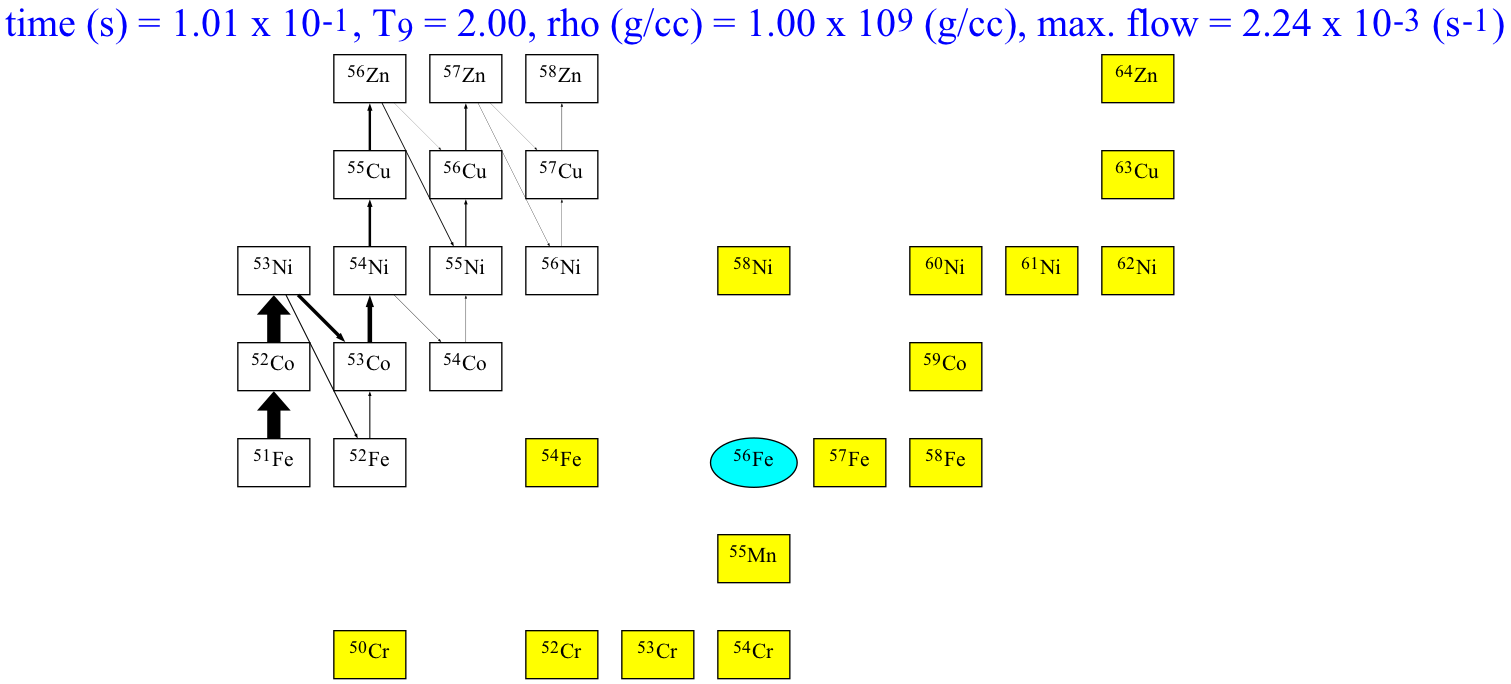

In [51]:
Image(filename=('./flow.png'))

### Integrated current graphs

An integrated current graph shows the time-integrated flows for reactions during a network calculation.  That is, it shows the total number of nuclei per nucleon that underwent the given reaction with the thickness of the arrow showing the strength of the integrated current.  As with the flow graph, choose a set of nucides and set title properties.

In [52]:
induced_nuc_xpath = "[z >= 40 and z <= 52 and a >= 78]"
graph_attributes = {
    "labelloc": "t",
    "fontsize": 30,
    "fontcolor": "green",
}

Now set some color tuples for reactions.

In [53]:
color_tuples = [
    ("[product = 'positron']", "red"),
]

Add attributes to special vertices (species).  Here we will use the [hexadecimal](https://www.w3schools.com/colors/colors_hexadecimal.asp) RGB scale for the colors.

In [54]:
special_attributes = {
    "mo100": {"fillcolor": "#cccccc", "shape": "oval", "style": "filled"},
    "pd110": {"fillcolor": "#009999", "shape": "diamond", "sytle": "filled"}
}

Choose the last zone since it contains the currents integrated over the full calculation.

In [55]:
zone_last = zone_data.get_zones(zone_xpath="[position() = last()]")

Now create the dictionary of graphs.

In [56]:
my_graphs = wn.graph.create_zone_integrated_current_graphs(
    net,
    zone_last,
    induced_nuc_xpath=induced_nuc_xpath,
    reaction_color_tuples=color_tuples,
    graph_attributes=graph_attributes,
    allow_isolated_species=False,
    edge_attributes=edge_attributes,
    solar_species = [],
    special_node_attributes=special_attributes,
)

Draw the graphs.

In [57]:
for zone in my_graphs:
    A = nx.nx_agraph.to_agraph(my_graphs[zone])
    A.layout()
    A.draw('current.png')

The figure is left in the appropriate folder for direct access or download, but we can also view it.

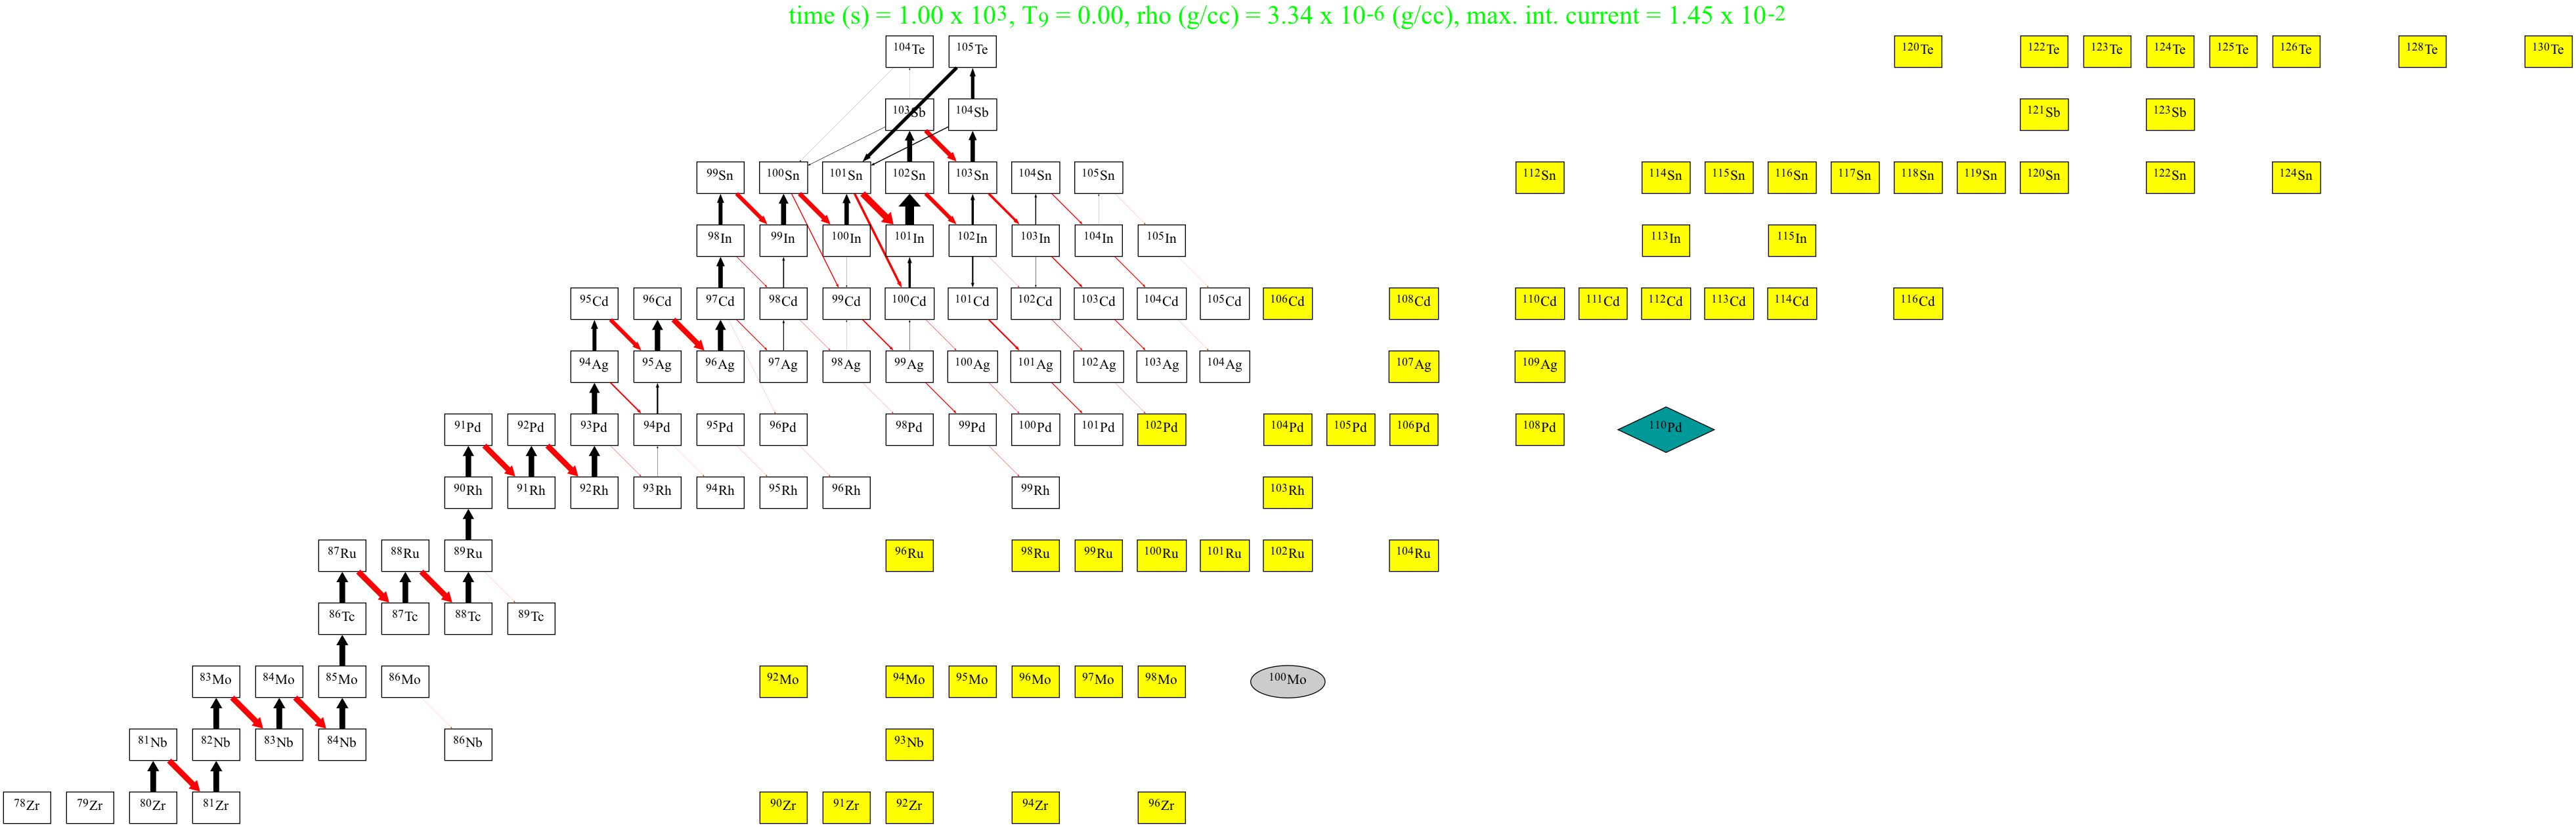

In [58]:
Image(filename=('./current.png'))